<a href="https://colab.research.google.com/github/Xergon-sci/Predicting-chemical-hardness-A-study-using-machine-learning-and-artificial-neural-networks/blob/master/Model3_F2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialization
---



In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_table("/content/drive/My Drive/vub/dataset_R.txt", sep='\t')

In [ ]:
out = df.head()
out.to_excel('F2Ex.xlsx')

#Model Architecture
---
This model implements kernel regression from sci-kit learn.

# Data preprocessing
---



In [ ]:
# Convert data to array
dataset = df.values

# Split the data into features and label
features_RAW = dataset[:,2:44]
labels_RAW = dataset[:,44]

#---------- Preprocessing the data ----------
# Get the scaler from sci-kit learn
scaler = preprocessing.MinMaxScaler()

# Scale the features and the labels = normalization
scaled_features = scaler.fit_transform(features_RAW)
scaled_labels = labels_RAW / 10

# Split the set into training and validation 70/30
training_features, test_features, training_labels, test_labels = train_test_split(scaled_features, scaled_labels, test_size=0.15, random_state=153)

# These labels are used for training
training_labels = training_labels.astype(np.float)

# These labels are used for comparing only so they can be denormalized
test_labels = test_labels.astype(np.float)
test_labels = test_labels * 10

# Print the types of each set each set should be of type float
print('training features: ', training_features.dtype)
print('training labels: ', training_labels.dtype)
print('test features: ', test_features.dtype)
print('test labels: ', test_labels.dtype)

training features:  float64
training labels:  float64
test features:  float64
test labels:  float64


# Model assembly


---



In [ ]:
# Implement the kernel ridge regression
model = KernelRidge(alpha=0.01, degree=3)

# Train the model
model.fit(training_features, training_labels)

KernelRidge(alpha=0.01, coef0=1, degree=3, gamma=None, kernel='linear',
            kernel_params=None)

# Model evaluation NORMAL OBSOLETE




---



In [ ]:
# Make predictions based on the test set
test_predictions = model.predict(test_features)

# De normalize the predictions
test_predictions = test_predictions *10

# Calculate some statistics
mean_predictions = np.mean(test_predictions)
MAE = metrics.mean_absolute_error(test_labels, test_predictions)
MSE = metrics.mean_squared_error(test_labels, test_predictions)
RMSE = np.sqrt(metrics.mean_squared_error(test_labels, test_predictions))
accuracy = (1 - (RMSE / mean_predictions)) * 100

# Print the statistics
print('Mean Absolute Error:', MAE)  
print('Mean Squared Error:', MSE)  
print('Root Mean Squared Error:', RMSE)
print('Accuracy', accuracy)

# Plot some statistics
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions, s=2)
plt.title('Truth of predictions')
plt.xlabel('True Values / eV')
plt.ylabel('Predictions / eV')
lims = [0, 10]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.show()
plt.close()

error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.title('Error on prediction')
plt.xlabel("Prediction Error / eV")
_ = plt.ylabel("Count")
plt.show()
plt.close()

# Cross validation

In [ ]:
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.model_selection import KFold

kf = KFold(n_splits=3)

scoring = ['max_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error']
scores = cross_validate(model, scaled_features, scaled_labels, cv=kf, scoring=scoring)

cv_predictions = cross_val_predict(model, scaled_features, scaled_labels, cv=kf)

Max Error: 2.60671 (+/- 0.35218)
MAE: 0.27299 (+/- 0.02711)
MSE: 0.01373 (+/- 0.00405)
RMSE: 0.36957 (+/- 0.05405)


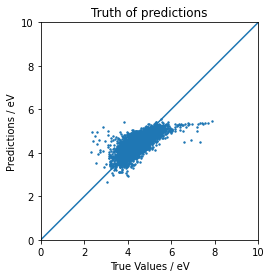

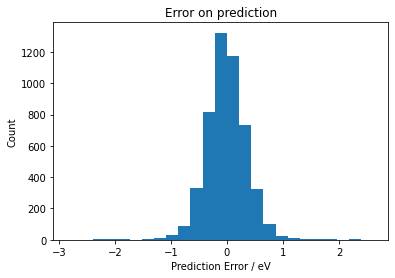

In [ ]:
print("Max Error: %0.5f (+/- %0.5f)" % (-(scores['test_max_error'].mean()*10), scores['test_max_error'].std() * 2*10))
print("MAE: %0.5f (+/- %0.5f)" % (-(scores['test_neg_mean_absolute_error'].mean()*10), scores['test_neg_mean_absolute_error'].std() * 2*10))
print("MSE: %0.5f (+/- %0.5f)" % (-(scores['test_neg_mean_squared_error'].mean()*10), scores['test_neg_mean_squared_error'].std() * 2*10))
print("RMSE: %0.5f (+/- %0.5f)" % (-(scores['test_neg_root_mean_squared_error'].mean()*10), scores['test_neg_root_mean_squared_error'].std() * 2*10))


denorm_cv_predictions = cv_predictions *10

# Plot some statistics
a = plt.axes(aspect='equal')
plt.scatter(labels_RAW, denorm_cv_predictions, s=2)
plt.title('Truth of predictions')
plt.xlabel('True Values / eV')
plt.ylabel('Predictions / eV')
lims = [0, 10]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.show()
plt.close()

error = denorm_cv_predictions - labels_RAW
plt.hist(error, bins = 25)
plt.title('Error on prediction')
plt.xlabel("Prediction Error / eV")
_ = plt.ylabel("Count")
plt.show()
plt.close()

In [ ]:
export = pd.DataFrame()
export['true'] = labels_RAW
export['predictions'] = denorm_cv_predictions

export.to_excel("exported_data.xlsx")